# Phân tích trend mua sắm theo từng Vùng (Region). Khám phá đặc trưng mua sắm của các Vùng.

Kiểu vùng nào bán chạy nhất (sắp xếp), vùng nào lợi nhuận/doanh thu/unit cao nhất (sắp xếp ra). Mặt hàng ưa thích tại các vùng và trên toàn quốc...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dataflow import df_train, df_test, df_geography, df_product
import matplotlib.pyplot as plt

In [2]:
# Kết nối tự nhiên giữa các bảng
df = df_train.merge(df_geography, on='Zip', how='left').merge(df_product, on='ProductID', how='left')

In [3]:
df.info()
# COGS: Cost of Goods Sold là vốn chi phí để sản xuất ra sản phẩm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901561 entries, 0 to 901560
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ProductID  901561 non-null  int64         
 1   Date       901561 non-null  datetime64[ns]
 2   Zip        901561 non-null  int64         
 3   Units      901561 non-null  int64         
 4   Revenue    901561 non-null  float64       
 5   COGS       901561 non-null  float64       
 6   City       901561 non-null  object        
 7   State      901561 non-null  object        
 8   Region     901561 non-null  object        
 9   District   901561 non-null  object        
 10  Category   901561 non-null  object        
 11  Segment    901561 non-null  object        
 12  Product    901561 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 89.4+ MB


In [4]:
df.head()

,ProductID,Date,Zip,Units,Revenue,COGS,City,State,Region,District,Category,Segment,Product
0,1228,2013-07-31,78773,12,19648.44,12309.747660,"Austin, TX",TX,Central,District #23,Urban,Convenience,Pirum UC-30
1,781,2014-03-12,90501,16,20351.52,13497.128064,"Torrance, CA",CA,West,District #37,Rural,Productivity,Natura RP-69
2,2090,2013-11-29,44460,26,111367.62,91488.499830,"Salem, OH",OH,East,District #14,Urban,Convenience,Currus UC-25
3,1116,2018-08-29,30122,12,36280.44,21967.806420,"Lithia Springs, GA",GA,East,District #09,Rural,Select,Pirum RS-04
4,993,2013-04-27,75789,14,55557.18,48645.866808,"Troup, TX",TX,Central,District #24,Urban,Convenience,Natura UC-56


### 📊 Ý nghĩa các cột trong dữ liệu

| **Cột**       | **Ý nghĩa** |
|--------------|------------|
| **ProductID** | ✅ Mã sản phẩm duy nhất. Mỗi sản phẩm có một ID riêng để theo dõi trong hệ thống. |
| **Date** | 📅 Ngày giao dịch. Giao dịch diễn ra vào ngày nào? Dữ liệu có thể dùng để phân tích xu hướng theo thời gian. |
| **Zip** | 🏠 Mã ZIP (Mã bưu điện). Xác định vị trí giao dịch, có thể dùng để phân tích theo khu vực địa lý nhỏ. |
| **Units** | 📦 Số lượng bán. Tổng số đơn vị sản phẩm đã bán trong giao dịch đó. |
| **Revenue** | 💰 Tổng doanh thu (tính bằng USD). Tính bằng công thức: `Revenue = Units × Giá bán trung bình`. Giá bán sản phẩm tại thời điểm khác nhau có thể khác nhau |
| **COGS** | 💲 Chi phí hàng hóa bán ra (Cost of Goods Sold - COGS). Đây là chi phí sản xuất hoặc mua hàng để tạo ra sản phẩm đó. |
| **City** | 🏙️ Thành phố nơi diễn ra giao dịch. Giúp phân tích doanh số theo địa lý. |
| **State** | 🇺🇸 Bang (State) của Mỹ nơi sản phẩm được bán. |
| **Region** | 🗺️ Vùng (Region) của Mỹ nơi diễn ra giao dịch. Ví dụ: `East`, `West`, `Central`. Dùng để phân tích doanh số theo vùng. |
| **District** | 📍 Quận (District). Là cấp hành chính nhỏ hơn của `Region`, giúp phân tích sâu hơn từng khu vực nhỏ. |
| **Category** | 🎯 Danh mục sản phẩm (Category). Chỉ định sản phẩm thuộc loại nào: `Urban`, `Rural`, `Youth`, `Mix`. |
| **Segment** | 🏷️ Phân khúc sản phẩm (Segment). Chỉ định nhóm sản phẩm theo đặc


## 1. Tổng hợp và sắp xếp doanh thu, số lượng sản phẩm bán ra, vốn bỏ ra, lợi nhuận theo từng vùng

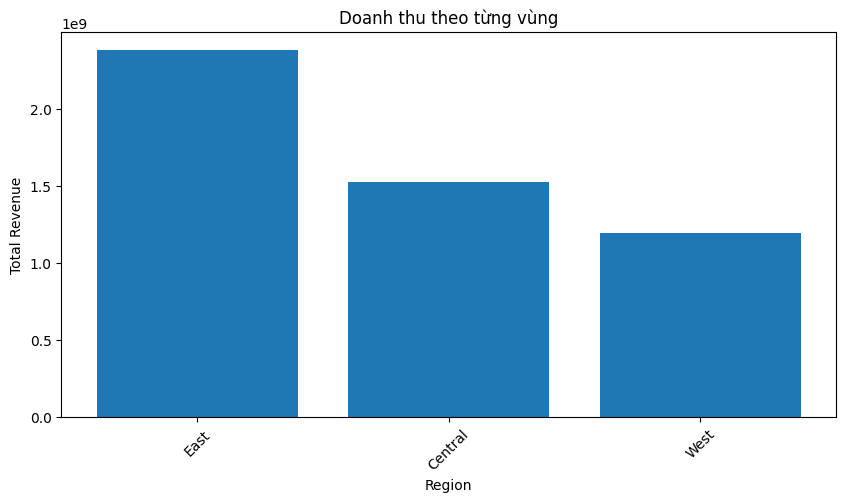

In [14]:
# Tổng hợp doanh thu theo vùng (Region)
region_revenue = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)

# Vẽ biểu đồ doanh thu theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_revenue.index, region_revenue.values)
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Doanh thu theo từng vùng")
plt.xticks(rotation=45)
plt.show()

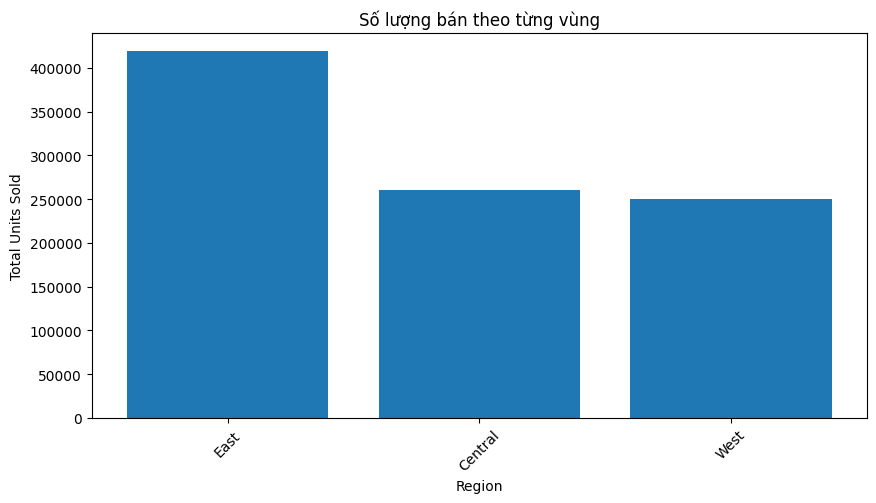

In [12]:
# Tổng hợp số lượng bán theo vùng
region_units = df.groupby("Region")["Units"].sum().sort_values(ascending=False)

# Vẽ biểu đồ số lượng bán theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_units.index, region_units.values)
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.title("Số lượng bán theo từng vùng")
plt.xticks(rotation=45)
plt.show()

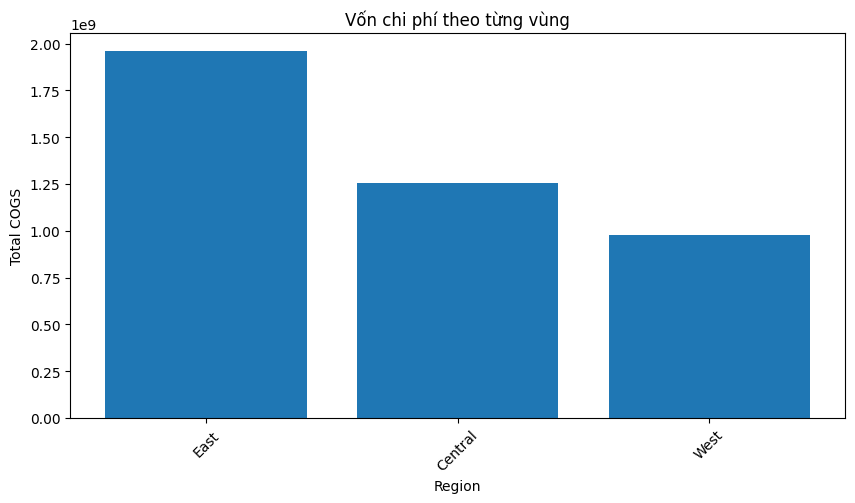

In [15]:
# Tổng hợp vốn chi phí theo vùng
region_cogs = df.groupby("Region")["COGS"].sum().sort_values(ascending=False)

# Vẽ biểu đồ vốn chi phí theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_cogs.index, region_cogs.values)
plt.xlabel("Region")
plt.ylabel("Total COGS")
plt.title("Vốn chi phí theo từng vùng")
plt.xticks(rotation=45)
plt.show()

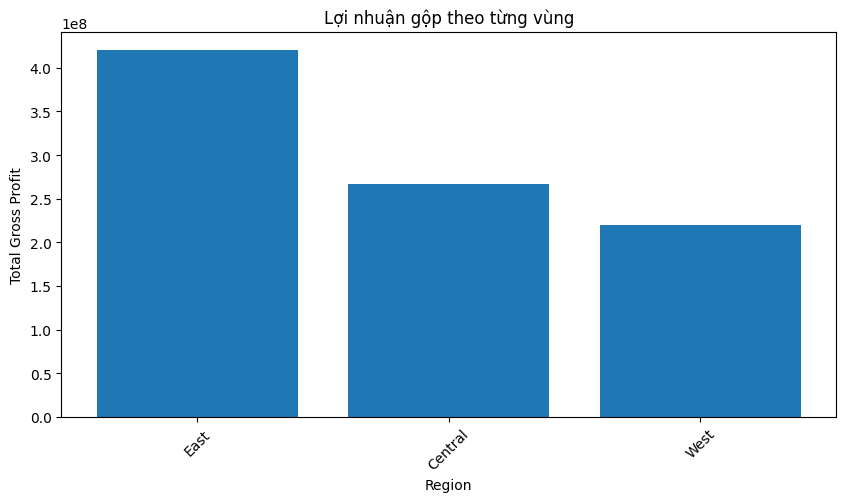

In [18]:
# Tính toán lợi nhuận gộp (Gross Profit)
df["Gross_Profit"] = df["Revenue"] - df["COGS"]

# Tổng hợp lợi nhuận theo vùng (Region)
region_profit = df.groupby("Region")["Gross_Profit"].sum().sort_values(ascending=False)

# Vẽ biểu đồ lợi nhuận theo vùng
plt.figure(figsize=(10, 5))
plt.bar(region_profit.index, region_profit.values)
plt.xlabel("Region")
plt.ylabel("Total Gross Profit")
plt.title("Lợi nhuận gộp theo từng vùng")
plt.xticks(rotation=45)
plt.show()


## 2. Xu hướng doanh thu theo thời gian trong từng vùng

C:\Users\Admin\AppData\Local\Temp\ipykernel_9104\2705911598.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9104\2705911598.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
C:\Users\Admin\AppData\Local\Temp\ipykernel_9104\2705911598.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


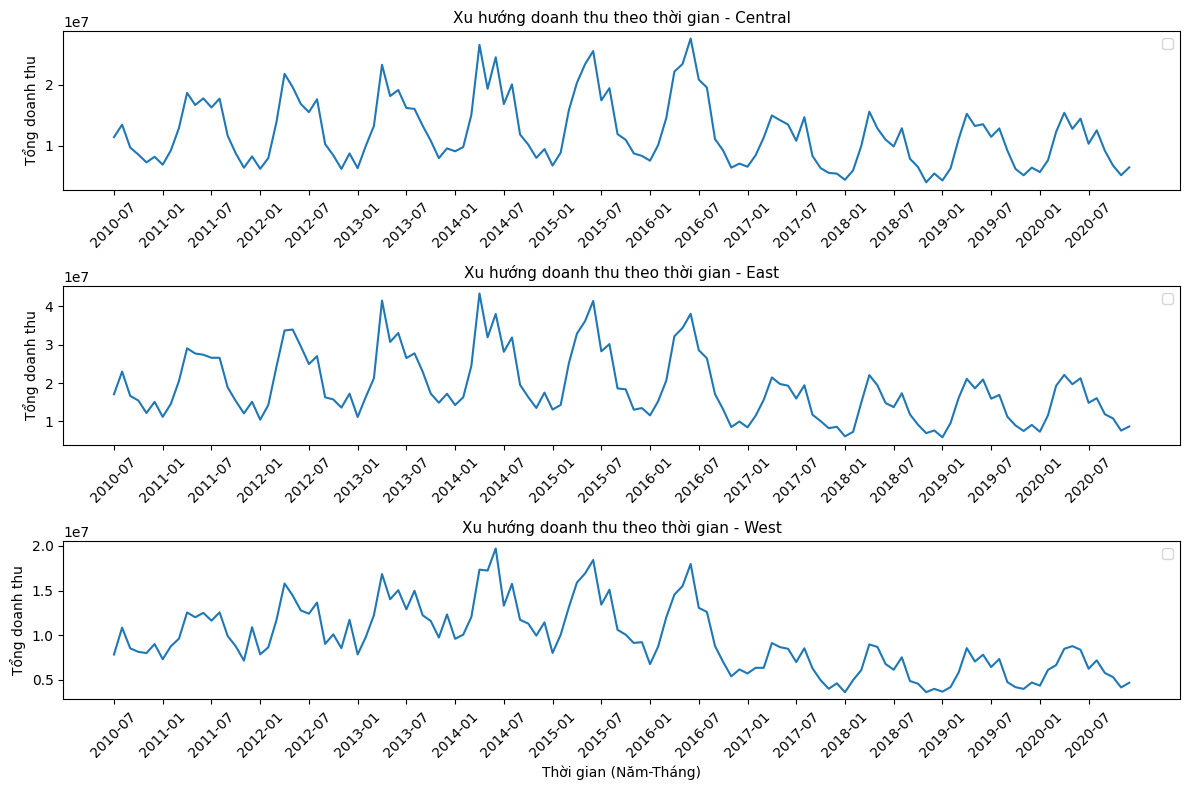

In [14]:
import matplotlib.pyplot as plt

# Tổng hợp doanh thu theo tháng và vùng
df["YearMonth"] = df["Date"].dt.to_period("M")
region_monthly_revenue = df.groupby(["YearMonth", "Region"])["Revenue"].sum().unstack()

# Chuyển Period thành string để vẽ biểu đồ đúng
region_monthly_revenue.index = region_monthly_revenue.index.astype(str)

# Lấy danh sách các vùng (giả sử có 3 vùng)
regions = region_monthly_revenue.columns

# Tạo 3 subplot (3 hàng, 1 cột), không share x để có thể tùy chỉnh ticks riêng
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

for i, region in enumerate(regions):
    # Vẽ đường cho vùng region
    axes[i].plot(region_monthly_revenue.index,
                 region_monthly_revenue[region],
                 )

    # Đặt tiêu đề và nhãn
    axes[i].set_title(f"Xu hướng doanh thu theo thời gian - {region}", fontsize=11)
    axes[i].set_ylabel("Tổng doanh thu", fontsize=10)

    # Căn chỉnh nhãn trục x (tùy chọn hiển thị mỗi 6 tháng)
    axes[i].set_xticks(range(0, len(region_monthly_revenue.index), 6))
    axes[i].set_xticklabels(region_monthly_revenue.index[::6], rotation=45)

    # Thêm legend cho mỗi subplot
    axes[i].legend()

# Chỉ đặt nhãn trục x cho subplot cuối cùng (hoặc bạn có thể đặt cho từng subplot)
axes[-1].set_xlabel("Thời gian (Năm-Tháng)", fontsize=10)

plt.tight_layout()
plt.show()


## 3. Phân tích theo Segment và Category theo số lượng sản phẩm bán ra

### Category (danh mục sản phẩm): Chia sản phẩm theo đặc điểm sử dụng hoặc đối tượng khách hàng mục tiêu.
- `Urban`: Sản phẩm dành cho môi trường đô thị.
- `Rural`: Sản phẩm phục vụ vùng nông thôn.
- `Youth`: Dòng sản phẩm dành riêng cho khách hàng trẻ tuổi (thanh thiếu niên, sinh viên, hoặc giới trẻ năng động).
- `Mix`: Dòng sản phẩm không thuộc một danh mục cụ thể nào mà có thể là sự kết hợp của nhiều nhóm khác nhau.

### Theo từng khu vực

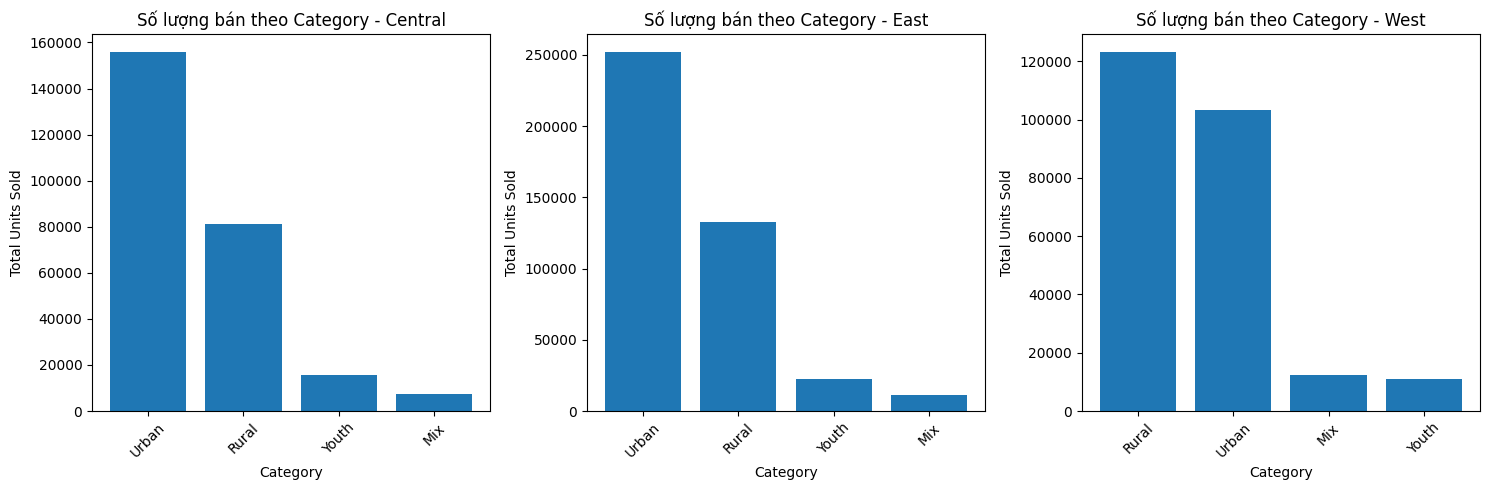

In [ ]:
import matplotlib.pyplot as plt

# Lấy danh sách các vùng (Region) bạn muốn phân tích.
# Giả sử bạn có 3 vùng: Central, East, West.
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Lặp qua từng vùng và từng trục tương ứng
# 
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Tính tổng Units bán được theo Category cho vùng này
    category_sales = (
        df_region.groupby("Category")["Units"].sum().sort_values(ascending=False)
    )
    
    # Vẽ biểu đồ cột, chỗ này cần dùng đến cái i này
    axes[i].bar(category_sales.index, category_sales.values)
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Total Units Sold")
    axes[i].set_title(f"Số lượng bán theo Category - {region}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Đánh giá các biểu đồ trên:
- Tập trung nguồn lực vào dòng sản phẩm Urban và Rural, vì đây là thị trường lớn nhất.
- Đánh giá lại dòng sản phẩm Youth và Mix, có thể cần cải thiện chiến lược tiếp thị hoặc thay đổi dòng sản phẩm. Đặc biệt dòng sản phẩm Mix có đối tượng sử dụng sản phẩm rất hạn chế.
- Nghiên cứu thêm về loại sản phẩm cụ thể trong từng Category để tối ưu chiến lược nhập hàng.

### Segment (Phân khúc sản phẩm): Chia sản phẩm theo nhu cầu hoặc giá trị sử dụng
- `Convenience`: Sản phẩm phổ thông, tiện lợi
- `Productivity`: Sản phẩm giúp người dùng tăng hiệu suất làm việc (có thể là công nghệ, thời trang công sở, v.v.).
- `Select`: Có thể là dòng cao cấp, mang tính thời trang hoặc đặc biệt.
- `Moderation`: Sản phẩm cân bằng giữa tiện ích, giá cả và chất lượng, phù hợp với khách hàng phổ thông.
- `Extreme`: Dòng sản phẩm chuyên biệt, có thể là sản phẩm thể thao, leo núi, hoặc các mặt hàng bền bỉ, cao cấp hơn.
- `Youth`: Sản phẩm hướng đến giới trẻ, thường có thiết kế thời trang, phong cách năng động.
- `Select`:	Dòng sản phẩm cao cấp, thiết kế tinh tế, giá thành cao hơn.
- `All Season`:	Sản phẩm có thể sử dụng quanh năm, không phụ thuộc vào mùa vụ.
- `Regular`:	Dòng sản phẩm tiêu chuẩn, không thuộc nhóm đặc biệt nào, có thể là các mặt hàng cơ bản.

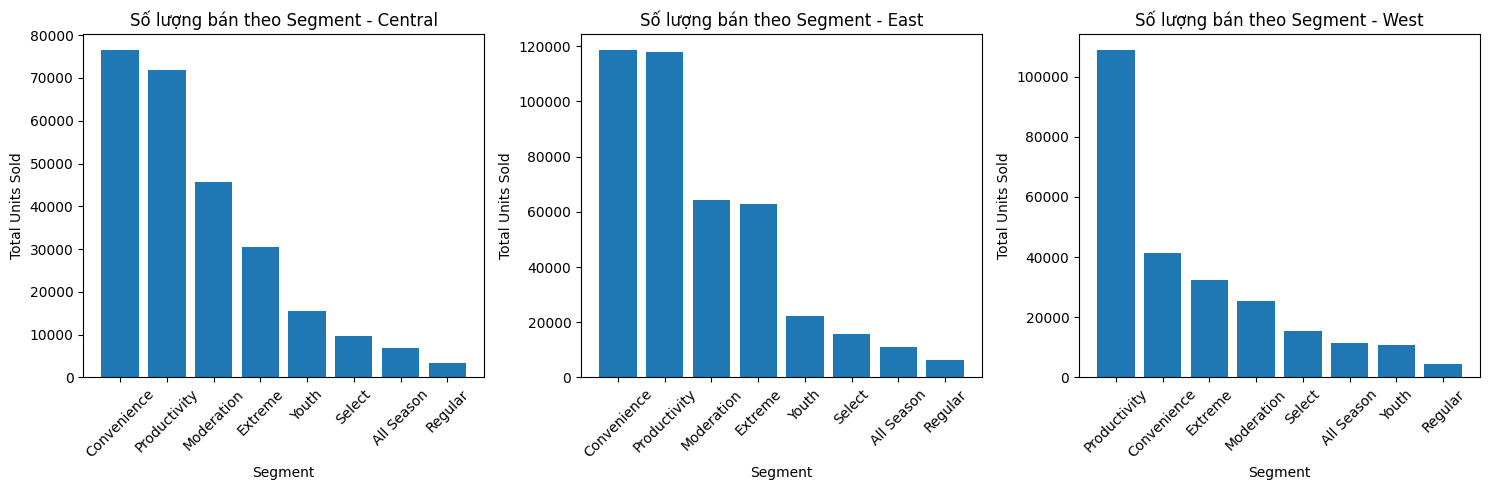

In [27]:
# Lấy danh sách các vùng (Region) bạn muốn phân tích
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Tính tổng Units bán được theo Segment cho vùng này
    segment_sales = df_region.groupby("Segment")["Units"].sum().sort_values(ascending=False)

    # Vẽ biểu đồ cột
    axes[i].bar(segment_sales.index, segment_sales.values)
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Total Units Sold")
    axes[i].set_title(f"Số lượng bán theo Segment - {region}")
    axes[i].tick_params(axis='x', rotation=45)  # Xoay nhãn để dễ đọc

plt.tight_layout()
plt.show()

### Đánh giá:
- Segment Productivity và Convenience có số lượng bán cao nhất, do nhu cầu xử dụng của các dòng sản phẩm này cao, đối tượng sử dụng đa dạng. Do đó công ty nên tập trung nhiều hơn vào các phân khúc này, mở rộng danh mục sản phẩm.
- Moderate và Extreme có doanh số trung bình. Xem xét mở rộng hoặc tinh chỉnh sản phẩm trong Moderation & Extreme để tối ưu doanh thu.
- Youth, Select, All Season, Regular có doanh số thấp. Có thể cần thay đổi chiến lược tiếp thị hoặc cải tiến sản phẩm.

### Nhóm theo Segment và Category

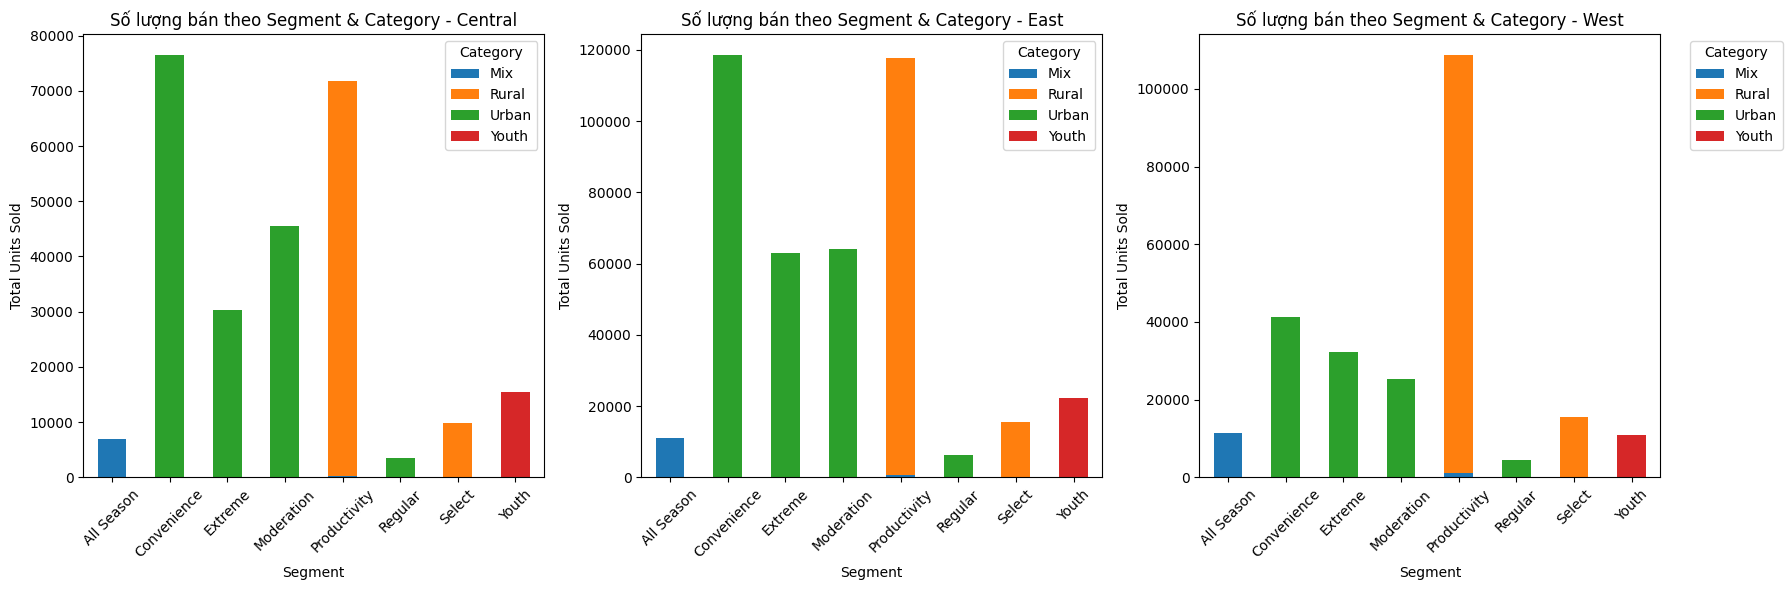

In [38]:
import matplotlib.pyplot as plt

# Lấy danh sách các vùng (Region) bạn muốn phân tích
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Tính tổng số lượng bán theo Segment và Category
    segment_category_sales = df_region.groupby(["Segment", "Category"])["Units"].sum().unstack()

    # Vẽ biểu đồ stacked bar chart
    segment_category_sales.plot(kind="bar", stacked=True, ax=axes[i])

    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Total Units Sold")
    axes[i].set_title(f"Số lượng bán theo Segment & Category - {region}")
    axes[i].tick_params(axis='x', rotation=45)

# Hiển thị legend ở subplot cuối cùng để tránh trùng lặp
axes[-1].legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


### Đánh giá:
- Urban có nhiều phân khúc bán chạy (Convenience, Extreme, Moderation).
- Rural chủ yếu tập trung vào Productivity. Có thể khách hàng ở khu vực này thích các sản phẩm có tính thực dụng cao.
- Youth và Select có doanh số thấp hơn. Nhóm khách hàng này có thể chưa được tiếp cận hiệu quả.
- Regular, All Season, Select có doanh số thấp nhất. Điều này có thể do sản phẩm chưa phù hợp với thị trường hoặc cần nhiều chiến lược quảng bá hơn.

## 4. Phân tích theo Segment và Category theo doanh thu

### Category

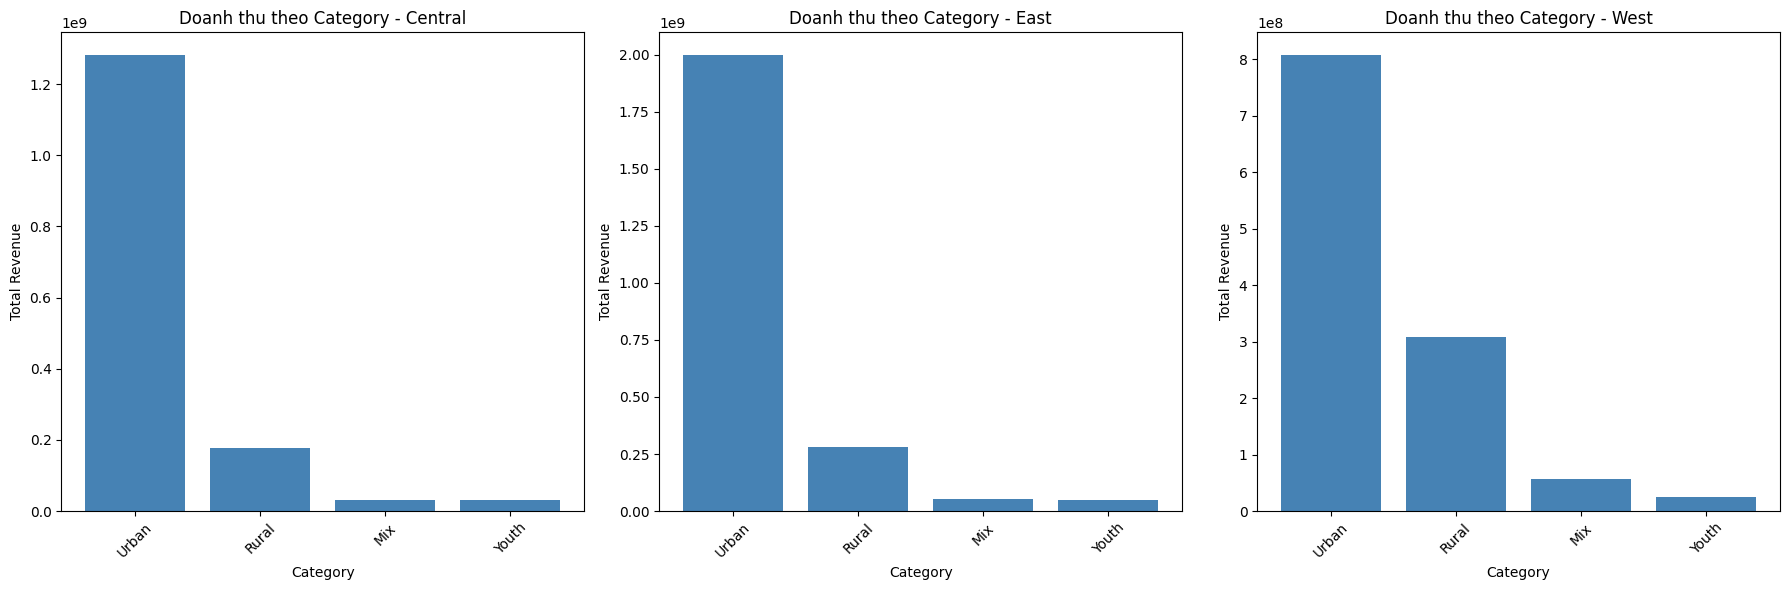

In [39]:
# Lấy danh sách các vùng (Region)
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Nhóm dữ liệu theo Category để tính tổng Revenue
    category_revenue = df_region.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

    # Vẽ biểu đồ cột
    axes[i].bar(category_revenue.index, category_revenue.values, color="steelblue")
    
    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Category")
    axes[i].set_ylabel("Total Revenue")
    axes[i].set_title(f"Doanh thu theo Category - {region}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Segment

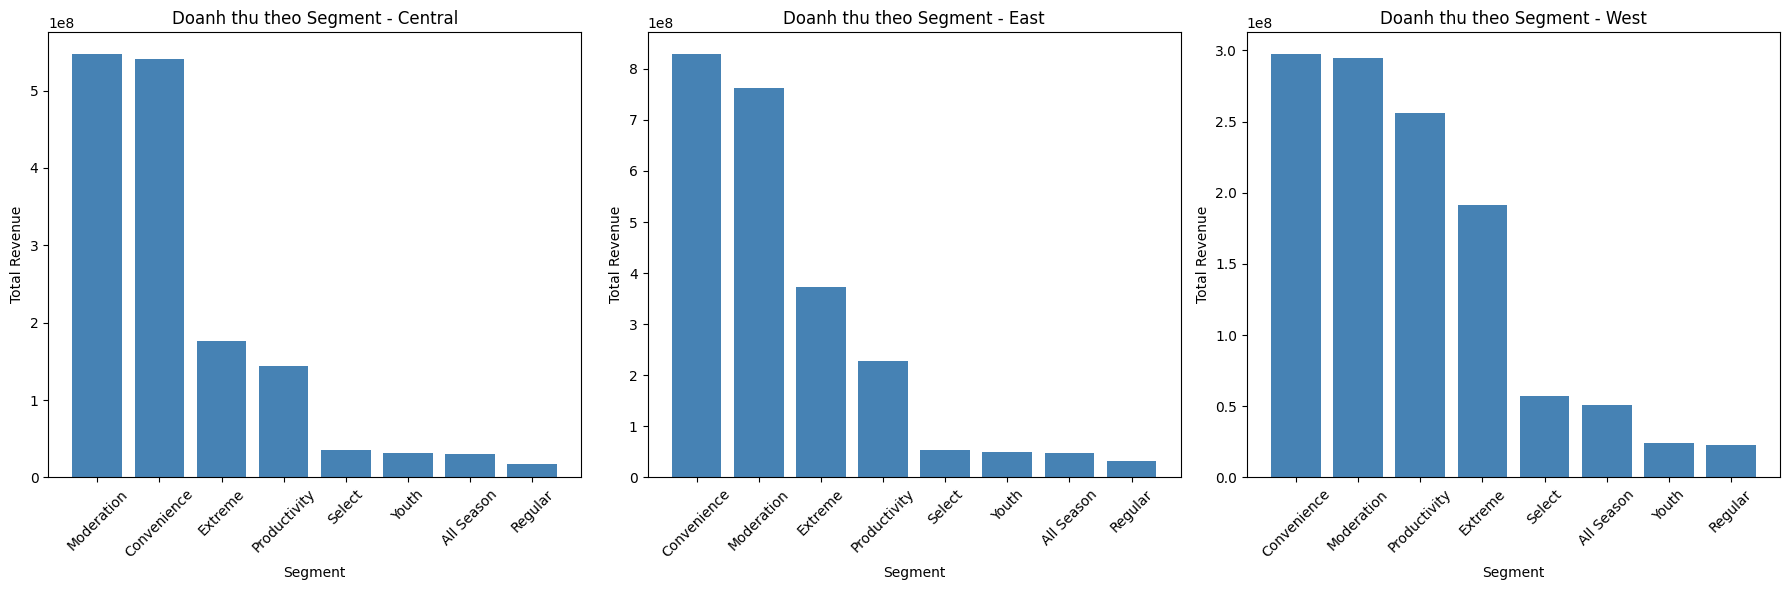

In [40]:
# Lấy danh sách các vùng (Region)
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Nhóm dữ liệu theo Segment để tính tổng Revenue
    segment_revenue = df_region.groupby("Segment")["Revenue"].sum().sort_values(ascending=False)

    # Vẽ biểu đồ cột
    axes[i].bar(segment_revenue.index, segment_revenue.values, color="steelblue")

    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Total Revenue")
    axes[i].set_title(f"Doanh thu theo Segment - {region}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Segment và Category

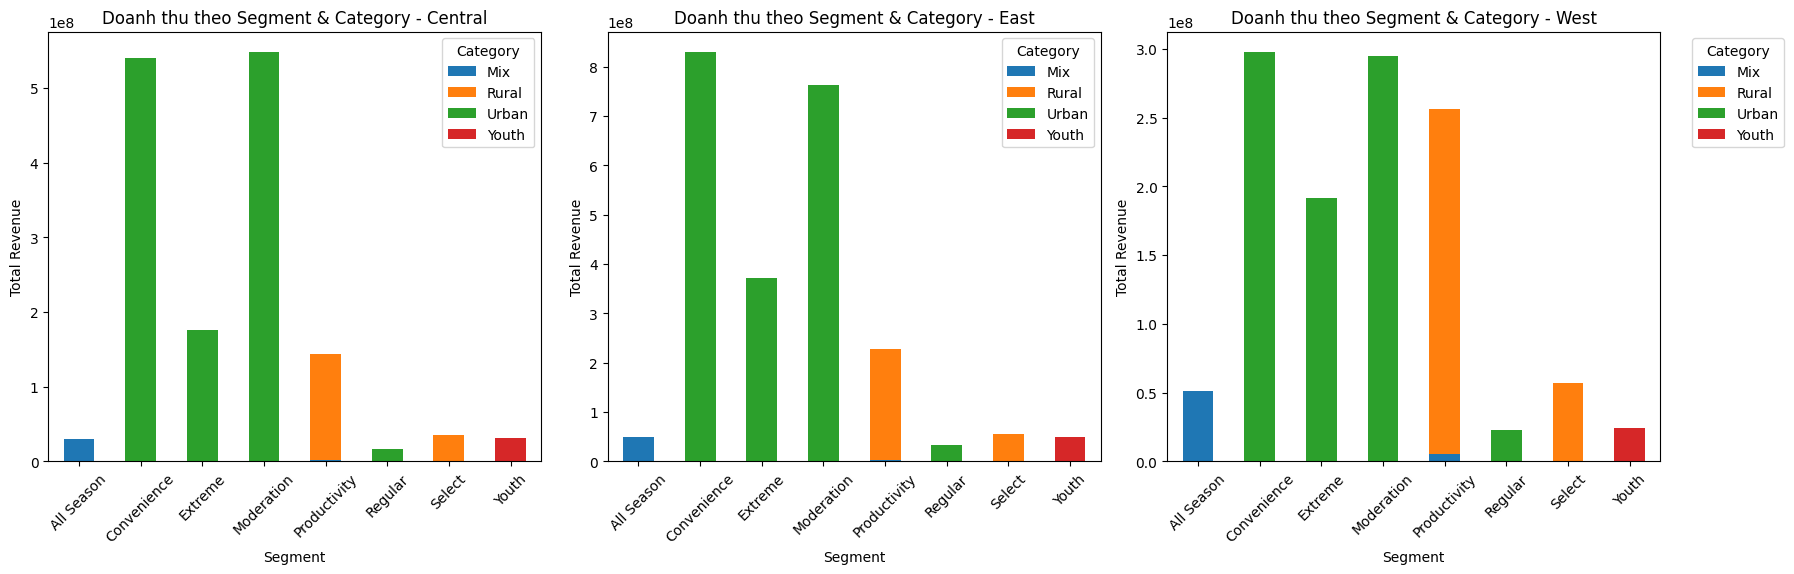

In [41]:
# Lấy danh sách các vùng (Region)
regions = ["Central", "East", "West"]

# Tạo 3 subplot nằm ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lặp qua từng vùng và từng trục tương ứng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Nhóm dữ liệu theo Segment và Category để tính tổng Revenue
    segment_category_revenue = df_region.groupby(["Segment", "Category"])["Revenue"].sum().unstack()

    # Vẽ biểu đồ stacked bar chart
    segment_category_revenue.plot(kind="bar", stacked=True, ax=axes[i])

    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Segment")
    axes[i].set_ylabel("Total Revenue")
    axes[i].set_title(f"Doanh thu theo Segment & Category - {region}")
    axes[i].tick_params(axis='x', rotation=45)

# Hiển thị legend ở subplot cuối cùng để tránh trùng lặp
axes[-1].legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

## 5. Xác định hệ số tương quan Pearson giữa doanh thu và số lượng sản phẩm bán ra theo từng vùng

### Công thức hệ số tương quan Pearson

Công thức tính hệ số tương quan Pearson được định nghĩa như sau:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2} \times \sqrt{\sum (Y_i - \bar{Y})^2}}
$$

Trong đó:
- $ X_i, Y_i $ là các giá trị của hai biến cần so sánh.
- $ \bar{X}, \bar{Y} $ là giá trị trung bình của hai biến.
- **Tử số:** $ \sum (X_i - \bar{X})(Y_i - \bar{Y}) $ đo lường mức độ thay đổi cùng nhau của hai biến.
- **Mẫu số:** $ \sqrt{\sum (X_i - \bar{X})^2} \times \sqrt{\sum (Y_i - \bar{Y})^2} $ chuẩn hóa giá trị để không phụ thuộc vào đơn vị đo lường.

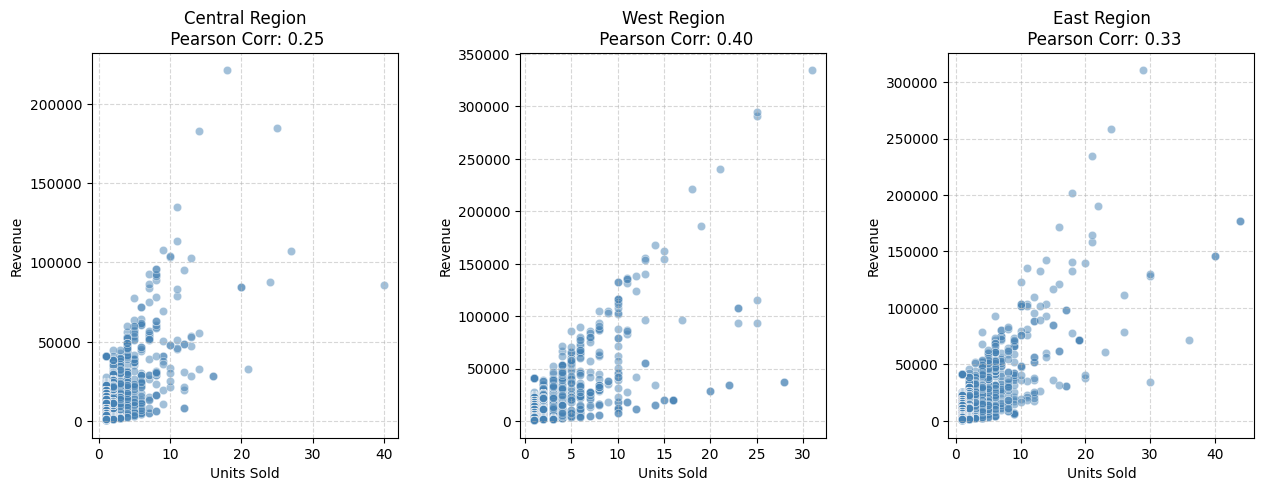

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lấy danh sách vùng
regions = df["Region"].unique()

# Tạo 3 subplot theo chiều ngang
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(wspace=0.4)

# Vẽ scatter plot cho từng vùng
for i, region in enumerate(regions):
    # Lọc dữ liệu theo vùng
    df_region = df[df["Region"] == region]
    
    # Tính hệ số tương quan Pearson giữa Units và Revenue
    correlation = df_region["Units"].corr(df_region["Revenue"])
    
    # Vẽ scatter plot
    sns.scatterplot(x=df_region["Units"], y=df_region["Revenue"], ax=axes[i], color="steelblue", alpha=0.5)
    
    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Units Sold", fontsize=10)
    axes[i].set_ylabel("Revenue", fontsize=10)
    axes[i].set_title(f"{region} Region\n Pearson Corr: {correlation:.2f}", fontsize=12)
    
    # Làm cho biểu đồ dễ nhìn hơn
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Hiển thị biểu đồ
plt.show()

### Đánh giá
- Có mối quan hệ tuyến tính dương yếu giữa số lượng bán `Units` và doanh thu `Revenue`.
- Không phải lúc nào số lượng bán cao cũng dẫn đến doanh thu cao. Giá bán sản phẩm có thể thay đổi theo các thời điểm khác nhau.
- Có thể có các yếu tố khác ảnh hưởng đến doanh thu, ví dụ như giá bán trung bình, loại sản phẩm, mùa vụ, khu vực...

## 6. Top các sản phẩm bán chạy nhất theo từng vùng

### Top 10 sản phẩm bán chạy nhất của cả 3 vùng

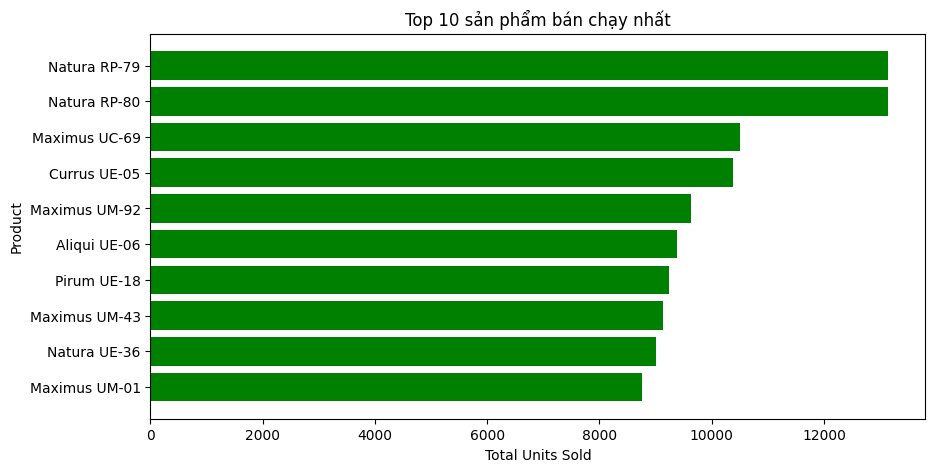

In [56]:
# Tổng hợp số lượng bán theo Product
product_sales = df.groupby("Product")["Units"].sum().sort_values(ascending=False).head(10)  # Top 10 sản phẩm bán chạy nhất

# Vẽ biểu đồ Top 10 sản phẩm bán chạy nhất
plt.figure(figsize=(10, 5))
plt.barh(product_sales.index, product_sales.values, color='green')
plt.xlabel("Total Units Sold")
plt.ylabel("Product")
plt.title("Top 10 sản phẩm bán chạy nhất")
plt.gca().invert_yaxis()  # Đảo ngược trục để sản phẩm bán chạy nhất lên trên
plt.show()

### Top 10 sản phẩm bán chạy nhất theo mỗi vùng

C:\Users\Admin\AppData\Local\Temp\ipykernel_9104\1504172040.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_region = region_product_sales.groupby("Region").apply(lambda x: x.nlargest(10, "Units")).reset_index(drop=True)


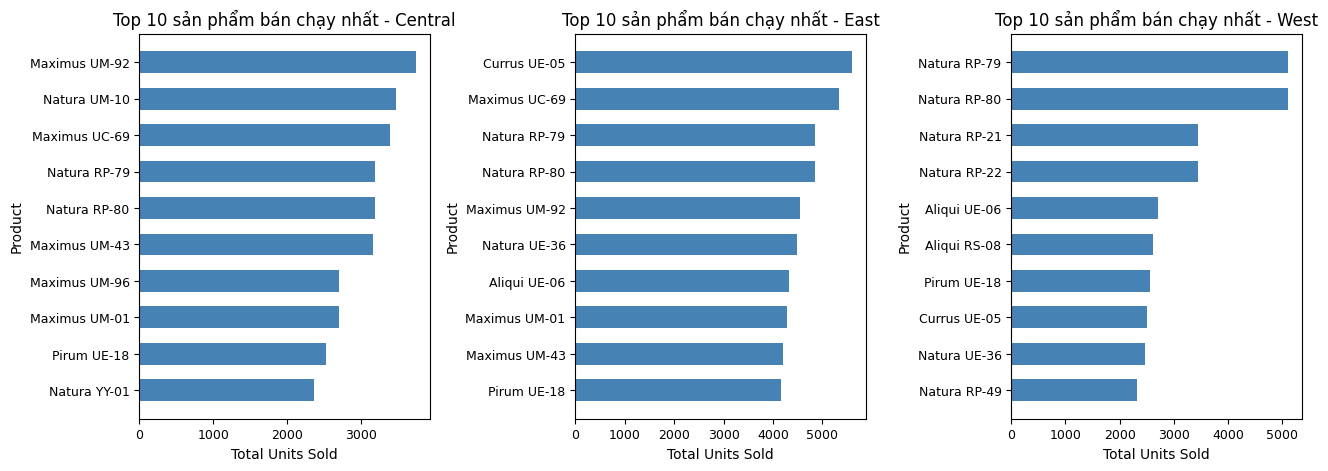

In [60]:
# Nhóm dữ liệu theo Region và Product, tính tổng số lượng bán ra
region_product_sales = df.groupby(["Region", "Product"])["Units"].sum().reset_index()

# Lấy Top 10 sản phẩm bán chạy nhất trong từng vùng
top_products_per_region = region_product_sales.groupby("Region").apply(lambda x: x.nlargest(10, "Units")).reset_index(drop=True)

# Lấy danh sách vùng
regions = top_products_per_region["Region"].unique()

# Tạo 3 subplot theo chiều dọc, giảm kích thước tổng thể
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Điều chỉnh khoảng cách giữa các subplot để trông gọn hơn
plt.subplots_adjust(wspace=0.5)

# Vẽ biểu đồ cho từng vùng
for i, region in enumerate(regions):
    region_data = top_products_per_region[top_products_per_region["Region"] == region]
    
    # Vẽ biểu đồ ngang
    axes[i].barh(region_data["Product"], region_data["Units"], color="steelblue", height=0.6)
    
    # Thiết lập tiêu đề và nhãn
    axes[i].set_xlabel("Total Units Sold", fontsize=10)
    axes[i].set_ylabel("Product", fontsize=10)
    axes[i].set_title(f"Top 10 sản phẩm bán chạy nhất - {region}", fontsize=12)
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)
    axes[i].invert_yaxis()  # Đảo ngược trục y để sản phẩm bán chạy nhất ở trên cùng

# Hiển thị biểu đồ
plt.show()


## 7. Phân tích ảnh hưởng của các thời điểm trong năm đến doanh thu

### Tổng doanh thu các tháng trong năm của cả 3 khu vực

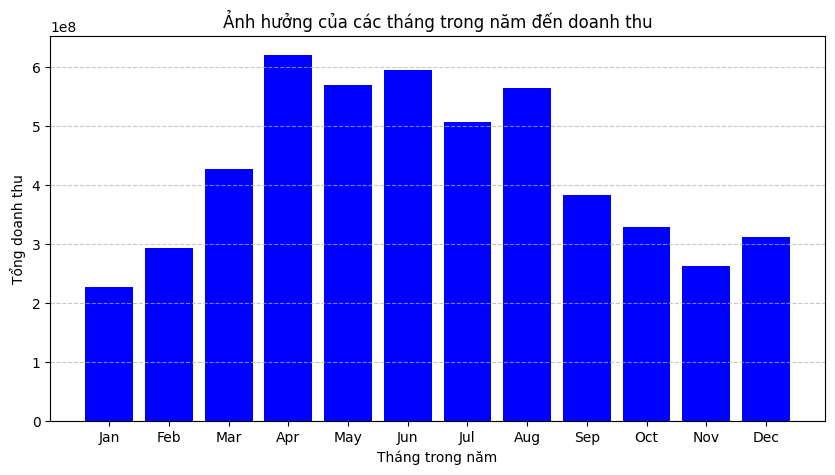

In [57]:
# Thêm cột "Month" để xác định tháng trong năm
df["Month"] = df["Date"].dt.month

# Tổng hợp doanh thu theo tháng
monthly_revenue = df.groupby("Month")["Revenue"].sum()

# Vẽ biểu đồ doanh thu theo tháng
plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue.index, monthly_revenue.values, color='blue')
plt.xlabel("Tháng trong năm")
plt.ylabel("Tổng doanh thu")
plt.title("Ảnh hưởng của các tháng trong năm đến doanh thu")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Tổng doanh thu các tháng trong năm của từng khu vực

<Figure size 1200x600 with 0 Axes>

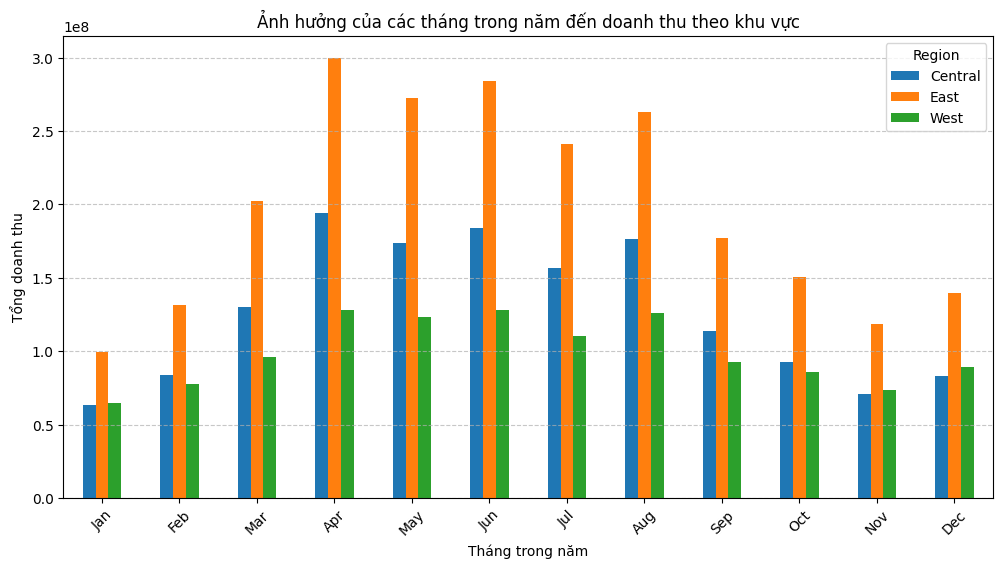

In [58]:
# Tổng hợp doanh thu theo tháng cho từng khu vực (Region)
monthly_revenue_region = df.groupby(["Month", "Region"])["Revenue"].sum().unstack()

# Vẽ biểu đồ doanh thu theo tháng cho từng khu vực
plt.figure(figsize=(12, 6))
monthly_revenue_region.plot(kind="bar", figsize=(12, 6))

# Thiết lập nhãn và tiêu đề
plt.xlabel("Tháng trong năm")
plt.ylabel("Tổng doanh thu")
plt.title("Ảnh hưởng của các tháng trong năm đến doanh thu theo khu vực")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.legend(title="Region")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Nhận xét:
- Tháng 4 và tháng 6 có doanh thu cao nhất, đặc biệt là khu vực East.
- Tháng 1, tháng 2, và tháng 11 có doanh thu thấp nhất.
- Đặc biệt, tất cả các vùng đều có mức doanh thu thấp hơn rõ rệt trong tháng 1. Điều này chứng tỏ mùa mua sắm chậm do sau kỳ nghỉ lễ lớn (Giáng sinh, Năm mới).

### Phân tích tiềm năng từ dữ liệu
📌 Chiến lược marketing & nhập hàng:
- Tăng cường nhập hàng vào tháng 3 – 6 và tháng 8, vì đây là thời gian doanh số cao.
- Chạy khuyến mãi vào tháng 1 & tháng 11 để kích thích nhu cầu mua sắm.

📌 Kiểm tra thêm yếu tố ảnh hưởng:
- Doanh thu cao vào mùa xuân & hè có thể liên quan đến các dịp giảm giá, sự kiện thời trang, hoặc lễ hội mùa hè.
- Doanh thu thấp vào đầu năm có thể do khách hàng chi tiêu ít hơn sau mùa lễ hội.

📌 Cơ hội tối ưu hóa doanh thu:
- Nếu biết tháng 4 & 6 là mùa cao điểm, có thể tăng giá nhẹ hoặc tối ưu chiến lược quảng cáo.
- Trong tháng thấp điểm (tháng 1, 2, 11), nên giảm giá mạnh hoặc tung ra sản phẩm mới để kích thích thị trường.

## 8. Tìm các sản phẩm bán ít mà doanh thu cao

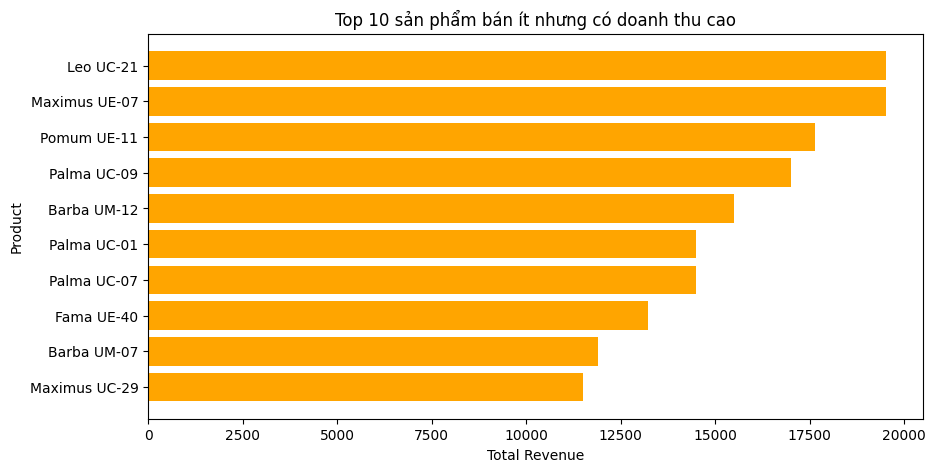

In [70]:
# Tính doanh thu trung bình mỗi đơn vị sản phẩm (Revenue per Unit)
df["Revenue per Unit"] = df["Revenue"] / df["Units"]

# Tìm sản phẩm bán ít nhưng doanh thu cao
low_sales_high_revenue = df.groupby("Product").agg(
    Total_Units=("Units", "sum"),
    Total_Revenue=("Revenue", "sum"),
    Revenue_per_Unit=("Revenue per Unit", "mean")
).sort_values(by=["Total_Units", "Total_Revenue"], ascending=[True, False])

# Lọc ra top 10 sản phẩm bán ít nhưng có doanh thu cao nhất
top_low_sales_high_revenue = low_sales_high_revenue.head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.barh(top_low_sales_high_revenue.index, top_low_sales_high_revenue["Total_Revenue"], color='orange')
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.title("Top 10 sản phẩm bán ít nhưng có doanh thu cao")
plt.gca().invert_yaxis()
plt.show()

## 9. So sánh độ biến động số lượng bán ra theo các vùng và theo sản phẩm

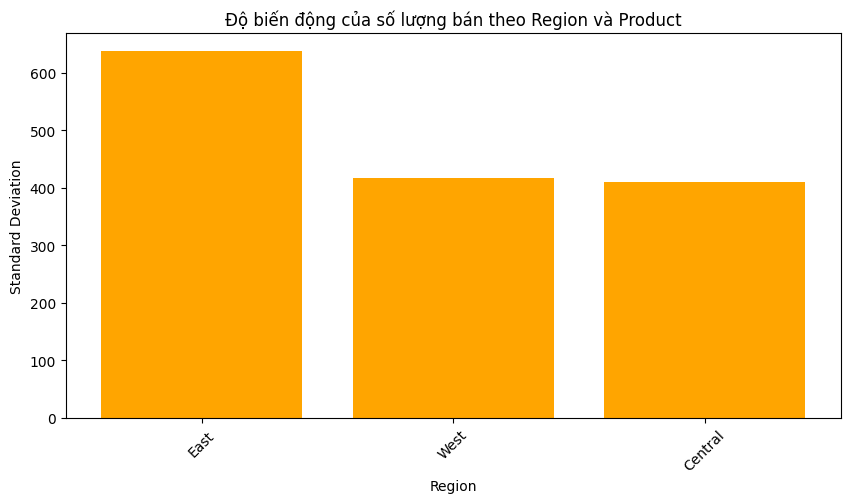

In [67]:
region_product_sales = df.groupby(["Region", "Product"])["Units"].sum().unstack()
region_variability = region_product_sales.std(axis=1).sort_values(ascending=False)

# Vẽ biểu đồ độ biến động của số lượng bán theo Region
plt.figure(figsize=(10, 5))
plt.bar(region_variability.index, region_variability.values, color='orange')
plt.xlabel("Region")
plt.ylabel("Standard Deviation")
plt.title("Độ biến động của số lượng bán theo Region và Product")
plt.xticks(rotation=45)
plt.show()

### Đánh giá
- Vùng East có độ biến động cao nhất. Sự chênh lệch về số lượng bán giữa các sản phẩm trong vùng này rất lớn: Một số sản phẩm có thể bán cực kỳ chạy, trong khi những sản phẩm khác bán rất ít.
- Vùng West và Central có độ biến động tương đương.

## 10. Phân tích sản phẩm Natura RP-79 là sản phẩm có doanh số bán được nhiều nhất

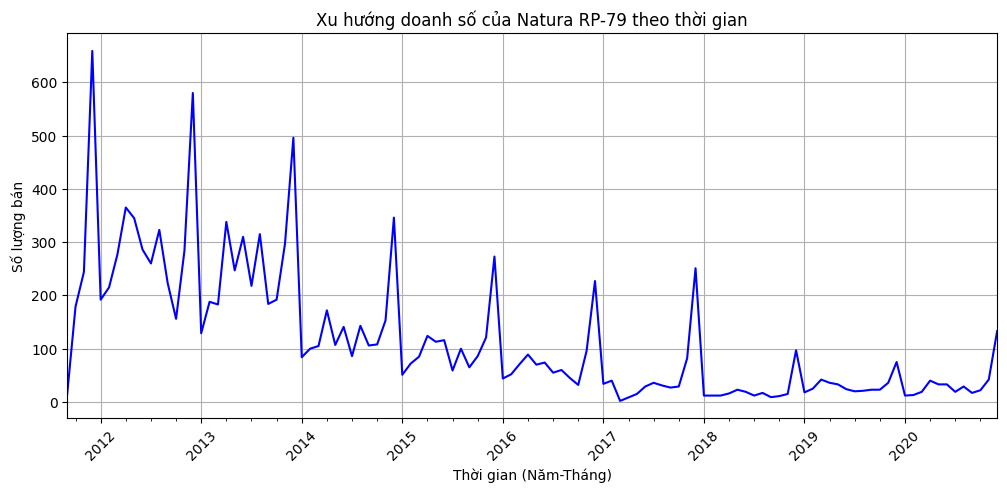

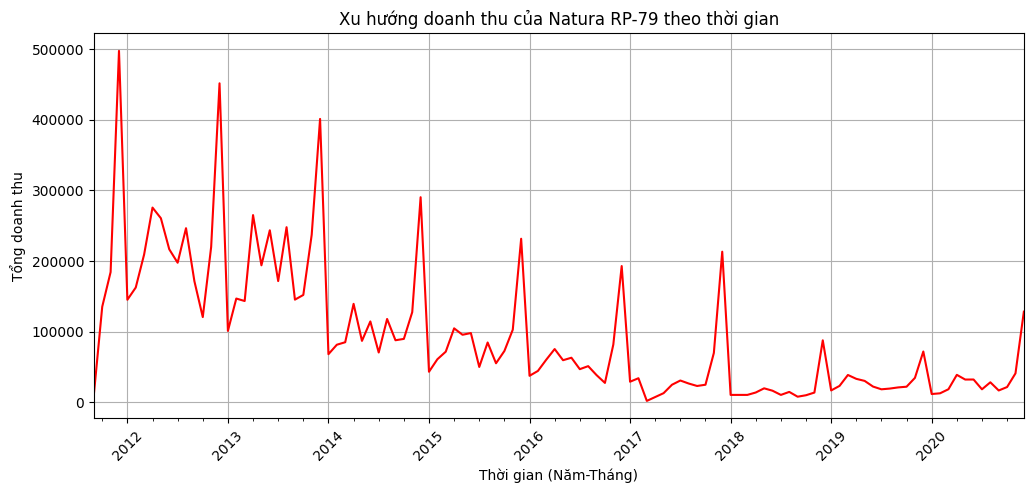

In [73]:
# Lọc dữ liệu cho sản phẩm "Natura RP-79"
natura_rp79_data = df[df["Product"] == "Natura RP-79"]

# Tổng hợp doanh số của sản phẩm theo từng khu vực
sales_by_region = natura_rp79_data.groupby("Region")["Units"].sum()

# Tổng doanh thu theo từng khu vực
revenue_by_region = natura_rp79_data.groupby("Region")["Revenue"].sum()

# Tổng hợp doanh số theo thời gian
sales_over_time = natura_rp79_data.groupby(df["Date"].dt.to_period("M"))["Units"].sum()

# Tổng hợp doanh thu theo thời gian
revenue_over_time = natura_rp79_data.groupby(df["Date"].dt.to_period("M"))["Revenue"].sum()

# Vẽ biểu đồ doanh số theo thời gian
plt.figure(figsize=(12, 5))
sales_over_time.plot(kind="line", color="blue")
plt.xlabel("Thời gian (Năm-Tháng)")
plt.ylabel("Số lượng bán")
plt.title("Xu hướng doanh số của Natura RP-79 theo thời gian")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Vẽ biểu đồ doanh thu theo thời gian
plt.figure(figsize=(12, 5))
revenue_over_time.plot(kind="line", color="red")
plt.xlabel("Thời gian (Năm-Tháng)")
plt.ylabel("Tổng doanh thu")
plt.title("Xu hướng doanh thu của Natura RP-79 theo thời gian")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


1️⃣ Nhận xét về xu hướng doanh số và doanh thu
🔹 Tổng quan:
- Sản phẩm Natura RP-79 từng đạt doanh thu và doanh số cao giai đoạn 2012 - 2014, sau đó giảm dần.
- Từ 2015 trở đi, doanh thu và số lượng bán hàng dao động mạnh, nhưng không duy trì được mức cao như trước đó.
- Xu hướng giảm dần theo thời gian, với một số đợt tăng đột biến vào từng thời điểm cụ thể.

📈 Xu hướng doanh thu (Biểu đồ 1 - Màu đỏ)
- Doanh thu cao nhất vào giai đoạn 2012 - 2014 nhưng giảm mạnh sau đó.
- Có các đỉnh tăng trưởng đột biến vào từng năm nhưng không kéo dài.
- Từ 2017 đến 2020, doanh thu rất thấp so với thời kỳ đầu, chỉ có một số tháng tăng đột ngột nhưng nhanh chóng giảm trở lại.

📦 Xu hướng số lượng bán ra (Biểu đồ 2 - Màu xanh)
- Số lượng bán cao vào các năm 2012 - 2014, nhưng sau đó giảm nhanh chóng.
- Có các đợt tăng đột biến theo chu kỳ, nhưng không duy trì ổn định.
- Trong những năm gần đây (2018 - 2020), sản phẩm bán được với số lượng rất thấp.

2️⃣ Định hướng chiến lược cho sản phẩm Natura RP-79

✅ Tại sao sản phẩm giảm doanh thu và doanh số?
- Có thể đã mất dần thị phần 📉
- Cần kiểm tra xem có sự thay đổi giá hay không.
- Không có chiến lược marketing hoặc sản phẩm bị thay thế 📢

🔹 Hướng đi chiến lược để phục hồi Natura RP-79

1️⃣ Xác định lại thị trường mục tiêu 🎯
- Kiểm tra xem khu vực nào vẫn còn nhu cầu → Tập trung tiếp thị tại những vùng này.
- Phân tích đối tượng khách hàng cũ và tìm cách tiếp cận lại họ.

2️⃣ Tạo chiến dịch khuyến mãi hoặc làm mới sản phẩm 💡
- Nếu giá quá cao, thử nghiệm chiến lược giảm giá có thời hạn để kích cầu.
- Nếu sản phẩm không còn thu hút, có thể tung phiên bản mới với một số cải tiến.

3️⃣ Tận dụng những giai đoạn doanh số đột biến 📊
- Có thể thấy một số tháng có doanh số cao hơn hẳn → Xác định lý do tại sao.
- Nếu doanh số tăng vào mùa đặc biệt, có thể tập trung marketing vào thời gian này.

4️⃣ Tìm hiểu nguyên nhân tăng đột biến trong từng năm 🕵️‍♂️
- Có sự kiện nào thúc đẩy doanh thu trong những tháng tăng đột biến không?
- Nếu có, hãy tái tạo những điều kiện đó để kích thích bán hàng.

### Theo 3 khu vực

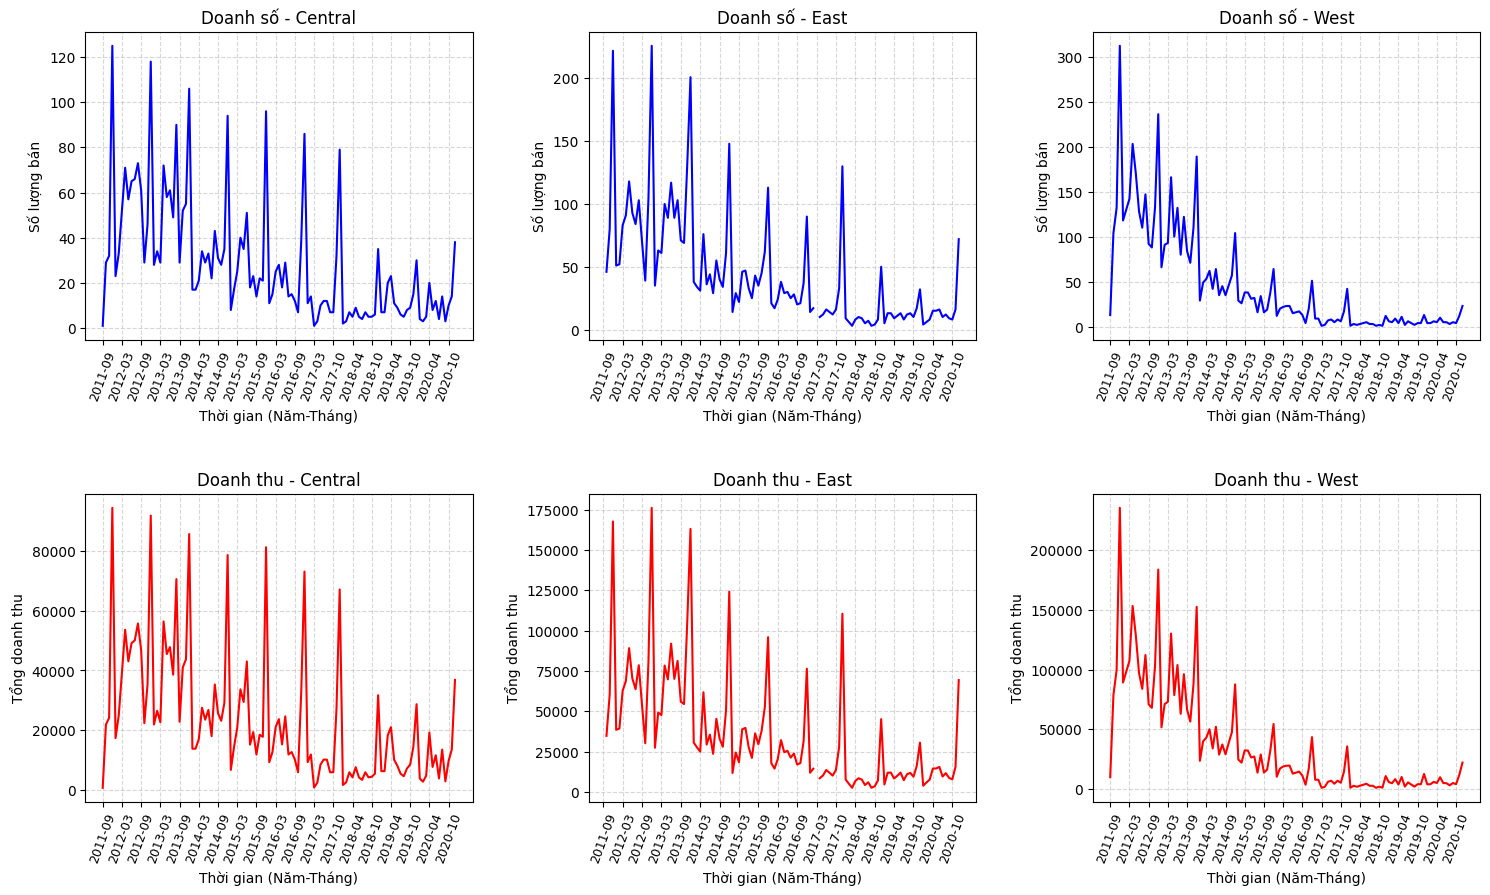

In [72]:
import matplotlib.pyplot as plt

# Lọc dữ liệu cho sản phẩm "Natura RP-79"
natura_rp79_data = df[df["Product"] == "Natura RP-79"]

# Tổng hợp số lượng bán theo thời gian và khu vực
sales_by_region_time = natura_rp79_data.groupby([df["Date"].dt.to_period("M"), "Region"])["Units"].sum().unstack()

# Tổng hợp doanh thu theo thời gian và khu vực
revenue_by_region_time = natura_rp79_data.groupby([df["Date"].dt.to_period("M"), "Region"])["Revenue"].sum().unstack()

# Chuyển đổi PeriodIndex thành string để vẽ
sales_by_region_time.index = sales_by_region_time.index.astype(str)
revenue_by_region_time.index = revenue_by_region_time.index.astype(str)

# Lấy danh sách các vùng (Region)
regions = sales_by_region_time.columns

# Tạo subplot (2 hàng, 3 cột) cho 6 biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Xác định nhãn trục x (giảm số lượng nhãn để tránh chồng chéo)
xticks_indices = range(0, len(sales_by_region_time.index), 6)  # Hiển thị mỗi 6 tháng

# Vẽ biểu đồ doanh số theo thời gian (hàng đầu tiên)
for i, region in enumerate(regions):
    axes[0, i].plot(sales_by_region_time.index, sales_by_region_time[region], color="blue", linestyle="-")
    axes[0, i].set_title(f"Doanh số - {region}", fontsize=12)
    axes[0, i].set_xlabel("Thời gian (Năm-Tháng)", fontsize=10)
    axes[0, i].set_ylabel("Số lượng bán", fontsize=10)
    axes[0, i].set_xticks([sales_by_region_time.index[j] for j in xticks_indices])  # Giảm số lượng nhãn
    axes[0, i].tick_params(axis='x', rotation=70)  # Xoay nhãn
    axes[0, i].tick_params(axis='x', labelsize=9)
    axes[0, i].tick_params(axis='y', labelsize=10)
    axes[0, i].grid(True, linestyle="--", alpha=0.5)

# Vẽ biểu đồ doanh thu theo thời gian (hàng thứ hai)
for i, region in enumerate(regions):
    axes[1, i].plot(revenue_by_region_time.index, revenue_by_region_time[region], color="red", linestyle="-")
    axes[1, i].set_title(f"Doanh thu - {region}", fontsize=12)
    axes[1, i].set_xlabel("Thời gian (Năm-Tháng)", fontsize=10)
    axes[1, i].set_ylabel("Tổng doanh thu", fontsize=10)
    axes[1, i].set_xticks([revenue_by_region_time.index[j] for j in xticks_indices])  # Giảm số lượng nhãn
    axes[1, i].tick_params(axis='x', rotation=70)  # Xoay nhãn
    axes[1, i].tick_params(axis='x', labelsize=9)
    axes[1, i].tick_params(axis='y', labelsize=10)
    axes[1, i].grid(True, linestyle="--", alpha=0.5)

# Hiển thị biểu đồ
plt.show()


### Đánh giá
1️⃣  Xu hướng:
- Cả doanh số và doanh thu có xu hướng giảm dần theo thời gian trong tất cả các vùng.
- Giai đoạn đầu (2011-2014) có doanh số cao, sau đó dần suy giảm đến cuối khoảng thời gian phân tích.
- Biến động mạnh trong giai đoạn đầu, sau đó trở nên ổn định hơn với mức doanh số và doanh thu thấp hơn.

💡Kết luận: Sản phẩm "Natura RP-79" có thể đã từng rất phổ biến nhưng dần bị giảm sức hút trên thị trường.

2️⃣ So sánh giữa các vùng:
- `West` có thể từng là thị trường quan trọng nhất nhưng hiện tại đã không còn duy trì sức bán.
- `East` có biến động nhẹ hơn, có thể vẫn còn tiềm năng nhưng không đáng kể.
- `Central` chưa bao giờ là thị trường mạnh, và doanh số cũng đang giảm tương tự.

3️⃣ Biến động doanh số và doanh thu
- Có sự dao động lớn trong giai đoạn đầu (2011-2014), đặc biệt là doanh thu có nhiều đỉnh cao.
- Từ 2015 trở đi, mức độ dao động giảm dần, cho thấy thị trường đã ổn định nhưng ở mức thấp.
- Những đợt tăng đột biến (spikes) có thể liên quan đến chiến dịch khuyến mãi hoặc nhu cầu theo mùa.

4️⃣ Đề xuất chiến lược

📌 Nếu muốn tiếp tục kinh doanh sản phẩm này:
- Xem xét chiến dịch giảm giá hoặc marketing lại sản phẩm để thu hút khách hàng cũ.
- Tập trung vào vùng East hơn vùng West, vì vẫn có một số biến động doanh số.
- Phân tích nguyên nhân mất thị phần (xu hướng thị trường, đối thủ cạnh tranh, sự thay đổi của khách hàng).

📌 Nếu muốn thay thế sản phẩm:
- Xác định sản phẩm thay thế phù hợp dựa trên xu hướng hiện tại.
- Dừng nhập hàng vào West & Central nếu không có chiến dịch cải thiện.
- Dựa vào phân tích này, có thể cân nhắc tập trung vào sản phẩm khác với tiềm năng cao hơn.

## 11. Phân tích 10 sản phẩm được bán chạy nhất

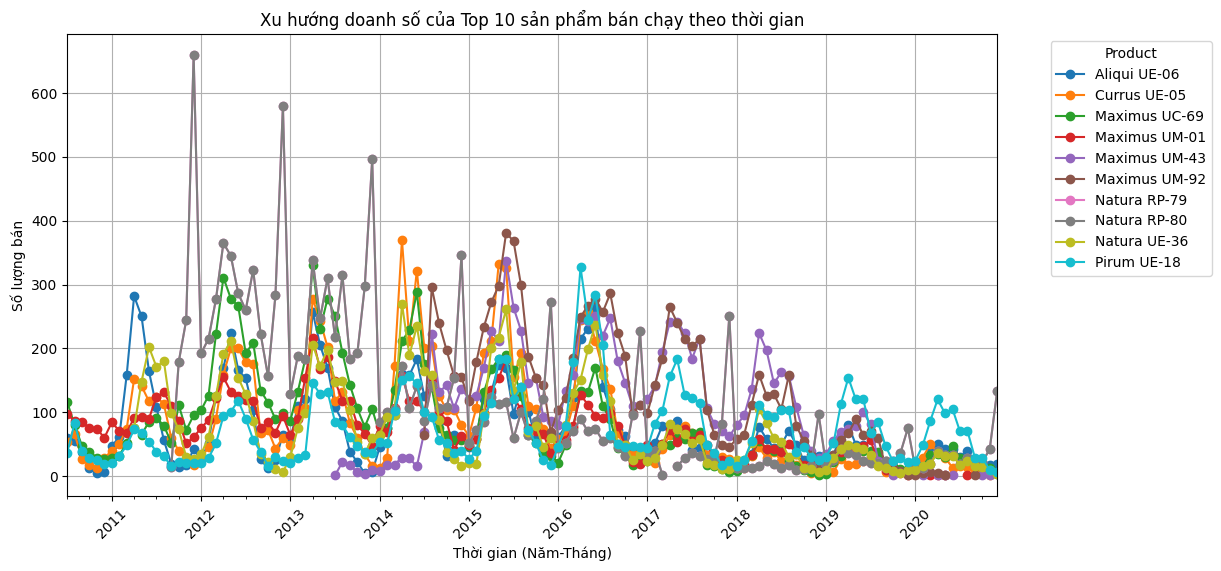

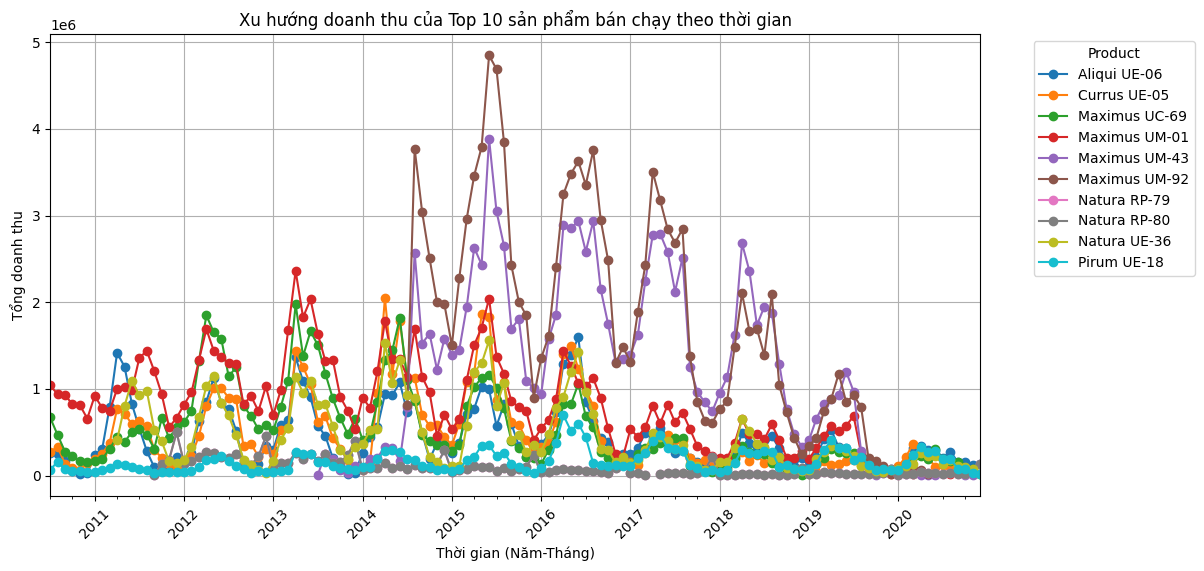

In [80]:
# Danh sách 10 sản phẩm bán chạy nhất
top_10_products = [
    "Natura RP-79", "Natura RP-80", "Maximus UC-69", "Currus UE-05", "Maximus UM-92",
    "Aliqui UE-06", "Pirum UE-18", "Maximus UM-43", "Natura UE-36", "Maximus UM-01"
]

# Lọc dữ liệu cho 10 sản phẩm này
top_products_data = df[df["Product"].isin(top_10_products)]

# Tổng hợp số lượng bán theo thời gian (tháng) cho từng sản phẩm
sales_over_time = top_products_data.groupby([df["Date"].dt.to_period("M"), "Product"])["Units"].sum().unstack()

# Tổng hợp doanh thu theo thời gian (tháng) cho từng sản phẩm
revenue_over_time = top_products_data.groupby([df["Date"].dt.to_period("M"), "Product"])["Revenue"].sum().unstack()

# Vẽ biểu đồ doanh số theo thời gian cho 10 sản phẩm
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind="line", marker="o", colormap="tab10", ax=plt.gca())
plt.xlabel("Thời gian (Năm-Tháng)")
plt.ylabel("Số lượng bán")
plt.title("Xu hướng doanh số của Top 10 sản phẩm bán chạy theo thời gian")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Vẽ biểu đồ doanh thu theo thời gian cho 10 sản phẩm
plt.figure(figsize=(12, 6))
revenue_over_time.plot(kind="line", marker="o", colormap="tab10", ax=plt.gca())
plt.xlabel("Thời gian (Năm-Tháng)")
plt.ylabel("Tổng doanh thu")
plt.title("Xu hướng doanh thu của Top 10 sản phẩm bán chạy theo thời gian")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## 12. Đánh giá sự thay đổi phương sai

### Tỷ lệ doanh thu trên số sản phẩm theo từng năm

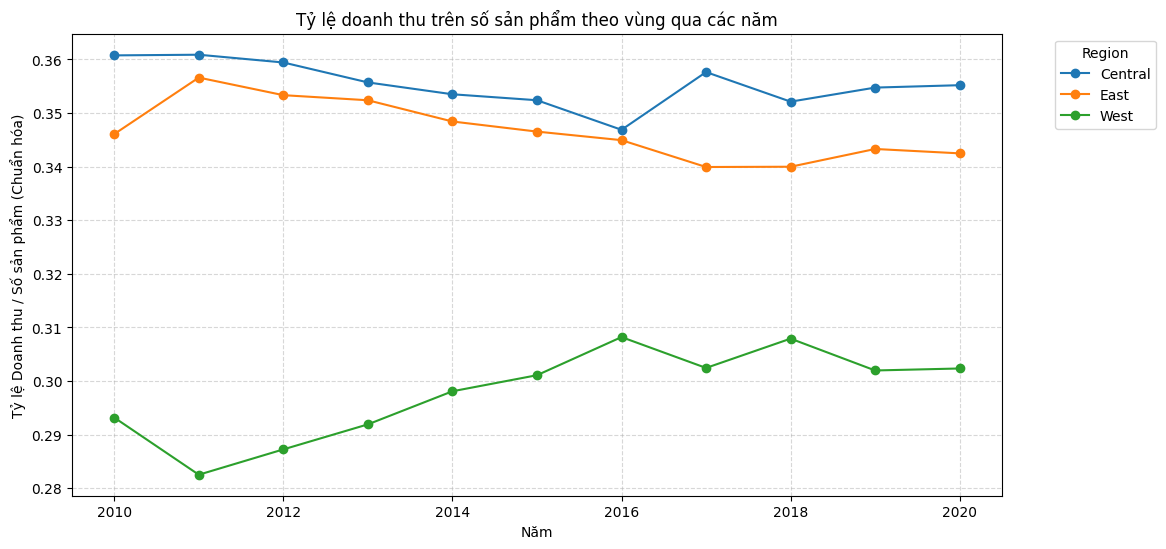

In [83]:
# Tính tỷ lệ doanh thu trên số sản phẩm bán ra cho từng vùng theo từng năm
df["Year"] = df["Date"].dt.year  # Thêm cột năm để nhóm dữ liệu

# Tính tổng doanh thu và tổng số sản phẩm bán ra theo năm và vùng
yearly_revenue = df.groupby(["Year", "Region"])["Revenue"].sum()
yearly_units = df.groupby(["Year", "Region"])["Units"].sum()

# Tính tỷ lệ doanh thu trên số sản phẩm
revenue_per_unit_by_region = yearly_revenue / yearly_units

# Chuẩn hóa theo tổng số trên toàn bộ vùng (tính tỷ lệ so với toàn bộ)
total_revenue_per_unit_by_year = revenue_per_unit_by_region.groupby("Year").sum()
normalized_revenue_per_unit = revenue_per_unit_by_region / total_revenue_per_unit_by_year

# Chuyển đổi về dạng DataFrame để dễ xử lý
normalized_revenue_per_unit_df = normalized_revenue_per_unit.unstack()

# Vẽ biểu đồ tỷ lệ doanh thu trên số sản phẩm theo từng năm
plt.figure(figsize=(12, 6))
normalized_revenue_per_unit_df.plot(kind="line", marker="o", ax=plt.gca())
plt.xlabel("Năm")
plt.ylabel("Tỷ lệ Doanh thu / Số sản phẩm (Chuẩn hóa)")
plt.title("Tỷ lệ doanh thu trên số sản phẩm theo vùng qua các năm")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


| **Vùng**   | **Xu hướng**                                                       | **Nhận xét**                                                               |
|------------|---------------------------------------------------------------------|----------------------------------------------------------------------------|
| **Central** | Duy trì tỷ lệ cao nhất, nhưng có sự giảm nhẹ giai đoạn 2013-2016, sau đó hồi phục. | Thị trường Central có thể có chiến lược định giá cao hơn, sản phẩm bán ra có giá trị lớn. |
| **East**    | Tăng mạnh 2010-2011, sau đó giảm dần đến 2017 rồi ổn định.         | Có thể là do cạnh tranh giá hoặc thay đổi trong sản phẩm bán ra.            |
| **West**    | Tỷ lệ thấp nhất nhưng có xu hướng tăng 2011-2016, sau đó dao động nhẹ. | Giá trị trung bình trên mỗi sản phẩm có thể được điều chỉnh dần theo xu hướng thị trường. |


### Tính phương sai của tỷ lệ doanh thu/số sản phẩm theo từng năm

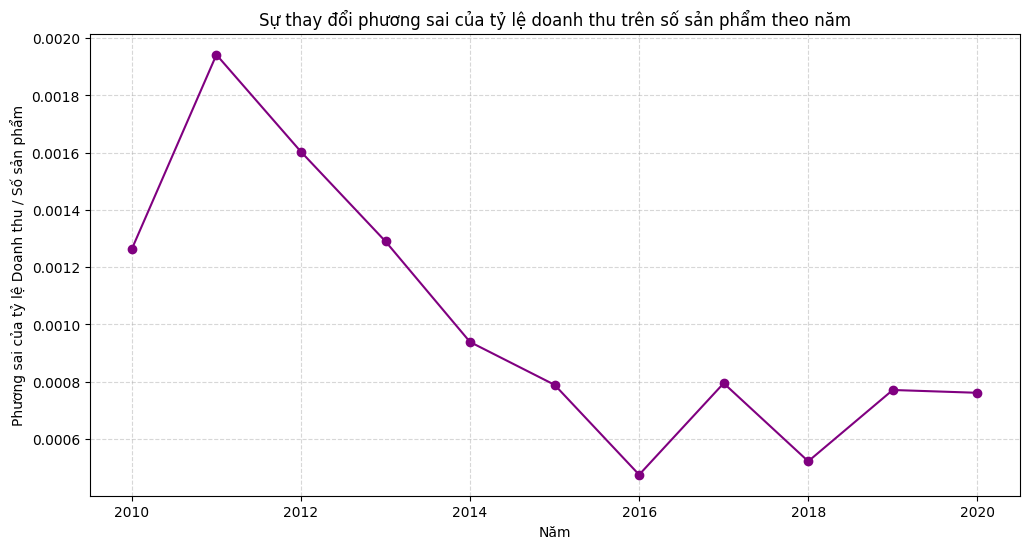

In [82]:
# Tính phương sai theo từng năm để đánh giá sự thay đổi
variance_by_year = normalized_revenue_per_unit_df.var(axis=1)

# Vẽ biểu đồ thể hiện sự thay đổi phương sai qua các năm
plt.figure(figsize=(12, 6))
plt.plot(variance_by_year.index, variance_by_year.values, marker="o", linestyle="-", color="purple")
plt.xlabel("Năm")
plt.ylabel("Phương sai của tỷ lệ Doanh thu / Số sản phẩm")
plt.title("Sự thay đổi phương sai của tỷ lệ doanh thu trên số sản phẩm theo năm")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

💡 Nhận xét theo giai đoạn:
- Giai đoạn 2010-2012: Thị trường chưa ổn định, các vùng có thể áp dụng chiến lược giá khác nhau.
- Giai đoạn 2012-2016: Sự khác biệt giá giữa các vùng giảm dần, có thể do cạnh tranh mạnh hơn hoặc sự đồng bộ trong chính sách giá.
- Giai đoạn 2016-2020: Thị trường trở nên ổn định, không có sự chênh lệch lớn giữa các vùng.

💡 Ý nghĩa kinh doanh
- Sự suy giảm phương sai cho thấy chiến lược giá đang trở nên đồng nhất giữa các vùng.
- Nếu muốn khai thác thị trường, có thể cần tập trung vào các yếu tố khác ngoài giá cả (chất lượng, dịch vụ,...).
- Nếu muốn tăng lợi nhuận, có thể xem xét phân khúc khách hàng thay vì áp dụng mức giá đồng đều cho tất cả các vùng.